# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [40]:

priors = [1 / 2, 1 / 2]
likelihoods = [0.75, 0.5]
def bayes_rule(priors, likehoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post
bayes_rule(priors, likelihoods)[0]
# I put index 0 to get the element referring to bowl 1


0.6

What is the probability that it came from Bowl 2?

In [41]:
# I put index 1 to get the element referring to bowl 2
bayes_rule(priors, likelihoods)[1]

0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [42]:
# I change the value of the likelihoods to match the chocolate cookies, then apply same formula
likelihoods = [0.25, 0.5]
bowl1, bowl2=bayes_rule(priors, likelihoods)
bowl1, bowl2

(0.3333333333333333, 0.6666666666666666)

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [43]:

# Getting data for yellow, green from bag 1 and bag 2
likelihoods_bag1 = [0.2, 0.1] # yellow, green
likelihoods_bag2 = [0.2, 0.14] # green, yellow
likelihoods=np.multiply(likelihoods_bag1, likelihoods_bag2)

bayes_rule(priors, likelihoods)[0]

0.7407407407407408

What is the probability that the yellow candy came from Bag 2?

In [44]:
bayes_rule(priors, likelihoods)[1]

0.25925925925925924

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [45]:
likelihoods_bag1 = [0.1, 0.2] # green,yellow
likelihoods_bag2 = [0.14, 0.2] # yellow, green
likelihoods=np.multiply(likelihoods_bag1, likelihoods_bag2)
bag1, bag2=bayes_rule(priors, likelihoods)
bag1, bag2

(0.25925925925925924, 0.7407407407407408)

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

### Initially, the probabilities of the car being behind each door are 1/3. So I choose Door A with probability 1/3 of being the right door. When I choose door A with prior probability of 1/3 it means that the prior probability of the car being in EITHER door b OR C is a total of 2/3. I now know that it is not in Door B, therefore now the 2/3 of prior probaility that was shared between door B and C refers only to door C, meaning I would theoretically have a 2/3 prior probability of the car being in door C and 1/3 in door A, so I therefore should change my choice to Door C. 

In [46]:
priors = [1 / 3, 1 / 3, 1 / 3]
likelihoods = [1 / 3, 0, 2 / 3]
bayes_rule(priors, likelihoods)

array([0.33333333, 0.        , 0.66666667])

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

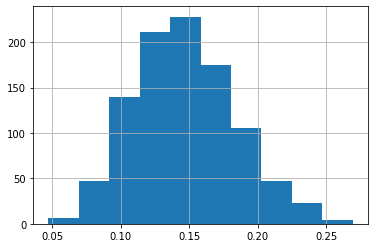

In [52]:
visitors = 100
first_day = 14
prob=first_day / visitors

n_draws = 100000

prior = pd.Series(np.random.uniform(0, 1, n_draws))

def generative_model(probability):
    return np.random.binomial(visitors, probability)


sim_data = []
for p in prior:
    sim_data.append(generative_model(p))
    
posteriors = prior[[i for i, x in enumerate(sim_data) if x == first_day]]
posteriors.hist();

Produce a set of descriptive statistics for the posterior distribution.

In [50]:
posteriors.describe()

count    9806.000000
mean        0.146940
std         0.034878
min         0.045394
25%         0.121912
50%         0.145006
75%         0.169629
max         0.289198
dtype: float64

What is the 90% credible interval range?

In [54]:
from_n=posteriors.quantile(0.05)
to_n=posteriors.quantile(0.995)
from_n, to_n

(0.09095969097181533, 0.24409688153537895)

What is the Maximum Likelihood Estimate?

In [58]:
rounded = posteriors.round(2)
mode = rounded.mode()
mode = mode[0]
print('Mode: ',mode)
# likelihood of mode
len(rounded[rounded == mode]) / len(rounded)

Mode:  0.14


0.10840932117527863